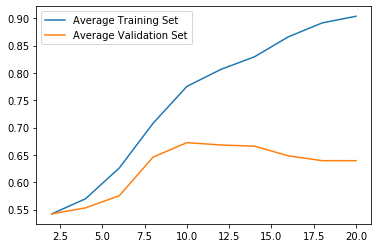

In [16]:
#Jacob Clarke
import math
import pandas as pd
import numpy as np
import copy
import random
%matplotlib inline
from matplotlib import pyplot as plt

splitIGList = []
#Function that calculates entropy based on formula given in class
#parameter probability, calculated from formula given in class
#returns the entropy or unknown 
def ent(probability):
    
    entropy = 0
    
    if probability != 0:
        entropy = (-1)*(probability * math.log2(probability))

    return entropy

#Functions that calculates probability based on formula given in class
#parameter is the numerator (p + n)/ denominator (total values)
#return the probability of the number in parameter
def prob(num,total):
    
    probability = 0
    
    if num != 0:
        probability = num/total
        
    return probability

def informationGain(data_frame):
    
    length = len(data_frame)
    attributes = data_frame.columns
    numCol = len(attributes) - 1
    startingEntropy = 0
    
    #create a list of the target attribute column
    #use the list to create a dictionary of targets
    dfToList = list(data_frame[attributes[numCol]])
    target_dict = {i:dfToList.count(i) for i in dfToList}
    dleng = len(target_dict)
    targets = target_dict.keys()
    targetsv = target_dict.values()
    
    #calculate the starting entropy 
    for value in target_dict.values():
        temp = prob(value,length)
        startingEntropy = startingEntropy + (temp*math.log2(temp))
    startingEntropy = startingEntropy*(-1)
    
    #print(startingEntropy)

    data = data_frame.to_numpy()
    infoGain = startingEntropy
    split = 0
    midpoint = 0
    remainder = 0
    count = 0
    
    #Create VGT and VLEQ Dictionary
    #VGT has all values to begin with and VLEQ have 0 values
    VGT_dict = copy.deepcopy(target_dict)
    VLEQ_dict = {}
    for k in VGT_dict:
        VLEQ_dict[k] = 0
        
    bestInfoGain = 0
    bestSplitOverall = 0
    bestTitleOverall = ""
    #Loop that will go through each column in the data set
    for i in attributes:
        
        #will hold the best split value for continuo
        bestSplit = 0
        bestTitle = ""
        
        tempVGT_dict = copy.deepcopy(VGT_dict)
        tempVLEQ_dict = copy.deepcopy(VLEQ_dict)
        #hold the biggest information gain for continuous attribute
        bestConInfoGain = 0

        #Makes sure to not calculate information gain for the target attribute column
        if i != attributes[numCol]:
            #sort the data_frame by comlumn
            data_frame = data_frame.sort_values(i)
            data = data_frame.to_numpy()
            
            #make a list of values from the current attribute column
            attrList = list(data_frame[attributes[count]])
            
            #dictionary of the values in the attribute list
            temp_dict = {i:attrList.count(i) for i in attrList}
            tLength = len(temp_dict)
            
            #list of all the values in the target column that correspond with the sorted attribute
            classList = list(data_frame[attributes[numCol]])
            class_dict = {i:classList.count(i) for i in classList}
           
            #if length of temp_dict is 2 than there are 2 possible values 
            if tLength == 2:
                
                #reset tempinfoGain
                tempinfoGain = startingEntropy
                
                #create a dicitonary for 0 and 1 attribute value
                tempAttr0_dict = {}
                tempAttr1_dict = {}
                tempAttr0Ent = 0
                tempAttr1Ent = 0
                tempSplit = .5
                
                #create a key in the dictionarys for the amount of values in the target class
                for k in class_dict:
                    tempAttr0_dict[k] = 0
                    tempAttr1_dict[k] = 0
                    bestTitle = i
                
                #Make a count of the number of class values for each binary number    
                for t in range(length):
                    temp = classList[t]
                    if attrList[t] == 0:
                        tempAttr0_dict[temp] += 1

                    elif attrList[t] == 1:
                        tempAttr1_dict[temp] += 1

                #calculates the entropy based on the binary values
                for k in tempAttr0_dict:
                    tempAttr0 = tempAttr0_dict[k]
                    tempAttr1 = tempAttr1_dict[k]
                    tempAttr0Ent = tempAttr0Ent + ent(prob(tempAttr0, sum(tempAttr0_dict.values())))
                    tempAttr1Ent = tempAttr1Ent + ent(prob(tempAttr1, sum(tempAttr1_dict.values())))
                    
                #calculate the remainder from the entropys
                remainder = (sum(tempAttr0_dict.values())/length)*(tempAttr0Ent) + (sum(tempAttr1_dict.values())/length)*(tempAttr1Ent)
                
                #calcluate the information gain from the 
                tempinfoGain = tempinfoGain - remainder
                splitIGList.append(i)
                splitIGList.append(tempSplit)
                splitIGList.append(tempinfoGain)
                if tempinfoGain > bestInfoGain:
                    bestInfoGain = tempinfoGain
                    bestSplitOverall = tempSplit
                    bestTitleOverall = bestTitle
                
            #continuous attribute
            else:
                
                #loop through the length of the data set
                for j in range(length):
                    
                    #calculates the midpoints between each continous value
                    if j == 0:
                        midpoint = float((data[0][count]))/2
                    elif j != length - 1:
                        midpoint = ((float(data[j-1][count])) + (float((data[j][count]))))/2
                    else:
                        midpoint = float((data[j][count]))
                    #first split point has no values less than or equal to so there is no need
                    #to calculate information gain
                    if j == 0:
                        tempVGT_dict[classList[j]] = tempVGT_dict[classList[j]] -1
                        tempVLEQ_dict[classList[j]] = tempVLEQ_dict[classList[j]] + 1
                    if j >0:   
                        #if 2 adjacent class values are different than this split can be considered
                        #a best split candidate and information gain should be calculated
                        if data[j-1][numCol] != data[j][numCol]:
                            tempinfoGain = startingEntropy
                            tempSplit = midpoint
                            tempTitle = i
                            tempVGTtotal = 0
                            tempVlEQtotal = 0
                            tempVGTEnt = 0
                            tempVLEQEnt = 0
                            infoGain = 0
                            remainder = 0
                            
                            #Move through the dictionarys and calculate the entropy for VLEQ and VGT
                            for k in tempVGT_dict:
                                tempVGT = tempVGT_dict[k]
                                tempVLEQ = tempVLEQ_dict[k]
                                tempVGTEnt = tempVGTEnt + ent(prob(tempVGT, sum(tempVGT_dict.values())))
                                tempVLEQEnt = tempVLEQEnt + ent(prob(tempVLEQ, sum(tempVLEQ_dict.values())))
                            
                            #calculate the remainder from the entropy of VLEQ and VGT
                            remainder = (sum(tempVGT_dict.values())/length)*(tempVGTEnt) + (sum(tempVLEQ_dict.values())/length)*(tempVLEQEnt)
                            
                            #calculate the information gain
                            tempinfoGain = tempinfoGain - remainder
                            if tempinfoGain > bestConInfoGain:
                                bestSplit = tempSplit
                                bestConInfoGain = tempinfoGain
                                bestTitle = tempTitle

                        tempVGT_dict[classList[j]] = tempVGT_dict[classList[j]] -1
                        tempVLEQ_dict[classList[j]] = tempVLEQ_dict[classList[j]] + 1
                splitIGList.append(i)
                splitIGList.append(bestSplit)
                splitIGList.append(bestConInfoGain)
                if bestConInfoGain > bestInfoGain:
                    bestInfoGain = bestConInfoGain
                    bestSplitOverall = bestSplit
                    bestTitleOverall = bestTitle
            
            
            bestListOverall = [bestTitleOverall, bestSplitOverall, bestInfoGain]
            
        
            count = count + 1
    

    return bestListOverall

class DecisionTree():
    max_depth = 3
    root = None
    #constructor
    def __init__(self, max_depth, rooty):
        self.max_depth = max_depth
        self.root = rooty
     # end __init__
    
    #set,get methods for Decision Tree 
    def getRoot(self):
        return self.root
    
    def setRoot(self, rooty):
        self.root = rooty
        
    def getDepth(self):
        return self.max_depth

    def __decision_tree_learning(self, examples, parent_examples, currentDepth, maxDepth):
        #variables to help with base cases
        exAttributes = examples.columns  #Series of attribute names           
        numColEx = len(exAttributes)-1  #length of the series
        exList = list(examples[exAttributes[numColEx]])  #List of all target values for examples
        example_dict = {i:exList.count(i) for i in exList}  #Dictionary of target values
        exampleLength = len(example_dict)  #Number of unique target values
        
        parentAttributes = parent_examples.columns  #Series of parent attribute names
        numCol = len(parentAttributes)-1  #Length of the series 
        parentExList = list(parent_examples[parentAttributes[numCol]]) #List of all target values for parent Examples
        parent_dict = {i:parentExList.count(i) for i in parentExList}  #Dictionary of all parent Example target values
        
        #base cases in DTL
        if examples.empty:  #if no examples left
            Node1 = Node(None, self.__plurality_value(parentExList, '?'), True)
            return Node1
        elif exampleLength == 1: #if dictionary is of length 1 then examples have all same target vals
            Node2 = Node(None, (list(example_dict.keys())[0]), True)
            return Node2
        elif numColEx == 1: #No attributes but class column exists
            Node3 = Node(None, self.__plurality_value(exList, '?'), True)
            return Node3
        elif currentDepth == maxDepth: #Max depth has been reached so leaf node must be created
            Node4 = Node(None,self.__plurality_value(exList, '?'), True)
            return Node4
        else:
            A = informationGain(examples)
            root = Node(A[0],A[1], False)
            
            #examples to be dropped
            rightDrop = []
            leftDrop = []
            #Goes through each row of the examples frame and compares value at best split attr to the best split in the Node
            #if greater than, the row goes to rightDrop, if less than, rows go to leftdrop
            for index in examples.index:
                if ((float(examples[A[0]][index])) > A[1]):
                    rightDrop.append(index)
                else:
                    leftDrop.append(index)
            
            #examples to use in child Nodes for left and right
            rightExs = examples.drop(leftDrop)
            leftExs = examples.drop(rightDrop)
            
            #drops the attribute column with best informationgain
            rightExs = rightExs.drop(root.attr, axis = 1)
            leftExs = leftExs.drop(root.attr, axis = 1)
            
            #Node Branches
            root.right = self.__decision_tree_learning(rightExs, examples, currentDepth + 1, maxDepth)
            root.left = self.__decision_tree_learning(leftExs, examples, currentDepth + 1, maxDepth)
            
            return root
    
    #method to build decision tree based on trainingset
    def fit(self, T, maxDepth):
        #fill in missing Values in the dataset with plurality values
        self.__fill_missing_vals(T, '?')
        
        
        #use decision tree learning to build the tree
        root = self.__decision_tree_learning(T,T,0, maxDepth)
        self.setRoot(root)
        bac

     # end fit
    
    #method to iterate through decision tree and make predictions from dataset given
    def predict(self, T):
        
        
        #fill in missing values of the data set
        self.__fill_missing_vals(T, '?')
        length = len(T)
        predictedList = []
        
        #traverse the tree to make a prediction
        for i in range(length):
            row = T.loc[i]
            #get the root of the fitted tree
            tempNode = self.getRoot()
            #Keep going through tree until you find a leaf
            while(tempNode.getLeaf() == False):
                attr = tempNode.getAttr()
                count = 0
                split = tempNode.getSplitVal()
                found = False
                while(found == False):
                    for index in row.index:
                        if index == attr:
                            if float(row[index]) > split: #if value is bigger than split move right
                                tempNode = tempNode.getRight()
                                found = True
                            else: #else, value is less than split so move left
                                tempNode = tempNode.getLeft()
                                found = True
                        count = count + 1
            #Once at a leaf Node the prediction is made
            if (tempNode.getLeaf() == True):
                predictedList.append(tempNode.getSplitVal())#Add the predicted value to a list
        return predictedList
                
     # end predict
    def print(self):
        self.__print_bfs()
     #end print

     # Helper methods related to handling of missing values can be
     # placed here. You may just copy methods from Homework2_Helper.py
    def __fill_missing_vals(self, df, missing_indicator):
        columns = df.columns.values
        for col in columns:
            col_vals = df[col].values

            for i in range(len(col_vals)):
                if col_vals[i] == missing_indicator:
                    pvalue = self.__plurality_value(col_vals, missing_indicator)
                    # Assuming here that we do not have to deal with columns that have
                    # all of their values missing
                    col_vals[i] = pvalue
                # end if
            # end inner for
        # end outer for
    # end __fill_missing_vals    

    def __plurality_value(self, class_vals, missing_indicator):
        class_vals_dict = self.__create_dict(class_vals, missing_indicator)
        max_val = class_vals_dict[max(class_vals_dict, key=class_vals_dict.get)]

        max_keys = []
        for key, val in class_vals_dict.items():
            if (val == max_val):
                max_keys.append(key)
        # end for
        return random.choice(max_keys)
    # end __plurality_value

    def __create_dict(self, attr_vals, missing_indicator):
        dict = {}
        for val in attr_vals:
            if val != missing_indicator:
                if val in dict:
                    dict[val] += 1
                else:
                    dict[val] = 1
        return dict
    # end __create_dict
    
    #https://stackoverflow.com/questions/1894846/printing-bfs-binary-tree-in-level-order-with-specific-formatting
    #found this code online, and modified it to work with my code
    def __print_bfs(self):
        
        #retreive root of the tree
        root = self.getRoot()
        
        #this level is a list of all Nodes in bfs order, root is first by default
        thislevel = [root]
        while thislevel:
            nextlevel = list()
            #traverses the list by index
            for n in thislevel:
                #prints the attribute of the current Node
                print(n.getAttr())
                if n.left: #checks if Node has a left Node
                    nextlevel.append(n.getLeft()) #adds the left Node to the List
                if n.right: #checks if Node has a right Node
                    nextlevel.append(n.getRight()) #adds right node to the list
            print()
            #changes thisLevel to represent the new level of nodes in the tree
            thislevel = nextlevel

class Node():
    splitPoint = None
    attr = None
    leaf = False
    left = None
    right = None
    #constructor of Node
    #if my node will end up being a leaf, the prediction value would be stored in its splitPoint
    def __init__(self,attr,splitVal, Leaf):
        self.left = None
        self.right = None
        self.splitPoint = splitVal  #will hold the predicion if leaf node
        self.attr = attr
        self.leaf = Leaf
        
    #set,get methods of Node    
    def getSplitVal(self):
        return self.splitPoint
    
    def setSplitVal(self,splitVal):
        self.splitPoint = splitVal
        
    def getLeft(self):
        return self.left
    
    def setLeft(self, newNode):
        self.left = newNode
        
    def getRight(self):
        return self.right
    
    def setRight(self, newNode):
        self.right = newNode
        
    def getAttr(self):
        return self.attr
    
    def getLeaf(self):
        return self.leaf

 # __init__, setters, and getters go here
# end class Node

def accuracy(predictList, data_set):
    #length of the dataset we are testing accuracy on
    length = len(data_set)
    
    #series of attribute/column header
    attributes = data_set.columns
    
    #last column that is represents the target column
    numCol = len(attributes)-1
    
    #numerator is how many predictions correct
    numerator = 0
    #length is the total number of predictions
    denominator = length
    #percentage correct
    percentage = 0
    
    #loop through data sets targets and predicted targets and test if they are eqaul
    for i in range(length):
        row = data_set.loc[i]
        if predictList[i] == row[numCol]:
            numerator = numerator + 1
    percentage = (numerator/denominator)
    return percentage
 # Return that percentage
# end accuracy
def validation_curve():
 # Read the arrhythmia.csv data set
    data = pd.read_csv('arrhythmia.csv')

 # Randomly shuffle the examples in the dataset
    data = data.sample(frac=1)
    
    lengthData = len(data)
    
    #length of partitions to be made
    partition1Length = lengthData/3
    partition1Length = int(partition1Length)
    partition2Length = int((lengthData-partition1Length)/2)
    partition3Length = int(lengthData - (partition1Length+partition2Length))
    partList = [partition1Length, partition2Length, partition3Length]
    
    #where to separate each partition
    part1 = partition1Length

    part2 = (partition1Length+partition2Length)

    part3 = part2 + partition3Length

    #dataframes of equal size
    partition1Frame = data[0:part1]
    partition2Frame = data[part1:part2]
    partition3Frame = data[part2:part3]

    #list of all the depth levels
    depthList = [2,4,6,8,10,12,14,16,18,20]
    
    #list of what combined trainingsets will be
    t1 = [partition1Frame, partition2Frame]
    t2 = [partition2Frame, partition3Frame]
    t3 = [partition1Frame, partition3Frame]

    #building of trainingsets and validation sets
    training_set1 = pd.concat(t1)
    training_set1 = training_set1.reset_index()
    validation_set1 = partition3Frame
    validation_set1 = validation_set1.reset_index()
    
    training_set2 = pd.concat(t2)
    training_set2 = training_set2.reset_index()
    validation_set2 = partition1Frame
    validation_set2 = validation_set2.reset_index()
    
    training_set3 = pd.concat(t3)
    training_set3 = training_set3.reset_index()
    validation_set3 = partition2Frame
    validation_set3 = validation_set3.reset_index()
    
    #lists to hold the percentage correct fo each ts and v
    per1t = []
    per1v = []
    
    per2t = []
    per2v = []
    
    per3t = []
    per3v = []
    
    #loop through each depth level and create trees using trainingsets as well as make predictions
    for c in range((len(depthList))):
        
        #lists that hold the predictions made
        classList1t = []
        classList1v = []
        
        classList2t = []
        classList2v = []
        
        classList3t = []
        classList3v = []
        
        #Empty trees created with maxDepth
        tree1 = DecisionTree(c, None)
        tree2 = DecisionTree(c, None)
        tree3 = DecisionTree(c, None)

        #training and predictions for ts1 and v1
        tree1.fit(training_set1, tree1.getDepth())
        rootles = tree1.getRoot()
        
        classList1t = tree1.predict(training_set1)
        
        classList1v = tree1.predict(validation_set1)
        
        #accuracies for ts1 and v1
        per1t.append(accuracy(classList1t,training_set1))
        per1v.append(accuracy(classList1v,validation_set1))
        
        #training and predictions for ts2 and v2
        tree2.fit(training_set2, tree2.getDepth())
        
        classList2t = tree2.predict(training_set2)
        
        classList2v = tree2.predict(validation_set2)
        
        #accuracies for ts2 and v2
        per2t.append(accuracy(classList2t,training_set2))
        per2v.append(accuracy(classList2v,validation_set2))

        #training and predictions for ts3 and v3
        tree3.fit(training_set3, tree3.getDepth())
        
        classList3t = tree3.predict(training_set3)
        
        classList3v = tree3.predict(validation_set3)
        
        #accuracies for ts3 and v3
        per3t.append(accuracy(classList3t,training_set3))
        per3v.append(accuracy(classList3v,validation_set3))
        
    #Lists that will hold the average values of all trainingsets and validationset accuracies
    averageTSList = []
    averageVList = []
    #loops through the lists for trainingsets and validationsets and calculates average accuracy at each depth
    for t in range(len(depthList)):
        temp1 = per1t[t] + per2t[t] + per3t[t]
        temp1 = (temp1)/3
        averageTSList.append(temp1)
        
        temp2 = per1v[t] + per2v[t] + per3v[t]
        temp2 = (temp2)/3
        averageVList.append(temp2)
        
    #plot the data based on the data above
    #t = plt.figure()
    #code I used to plot each indivdual training set and validation set
#     plt.plot(depthList,per1t)
#     plt.plot(depthList,per1v)
    
#     plt.plot(depthList,per2t)
#     plt.plot(depthList,per2v)
    
#     plt.plot(depthList,per3t)
#     plt.plot(depthList,per3v)

#plt.legend(['traininset1', 'validationset1', 'trainingset2', 'validationset2','trainingset3','validation3'], loc='upper left')
    #Plot the averageTSList data and averageVList Data
    t = plt.figure()
    plt.plot(depthList,averageTSList)
    plt.plot(depthList,averageVList)
    
    plt.legend(['Average Training Set', 'Average Validation Set'], loc='upper left')
    plt.show()
    t.savefig("Clarke_homework2.pdf",bbox_inches='tight')
    
# call validation_curve or main
validation_curve()

    